# My Project

## SafeBite: AI-Powered Allergen Detection


### Import the Library


In [54]:
import pandas as pd

### Load the Dataset

In [55]:
data = pd.read_csv('../Dataset/Allergen_Status_of_Food_Products.csv',keep_default_na=False)

### Exploratory Data Analysis


In [56]:
data.shape

(399, 9)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   399 non-null    object 
 3   Fat/Oil                     399 non-null    object 
 4   Seasoning                   399 non-null    object 
 5   Allergens                   399 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  399 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


The dataset contains 399 food products and has 9 columns, which include both categorical and numerical data.

In [58]:
(data['Prediction'].unique())

array(['Contains', 'Does not contain', ''], dtype=object)

The "Prediction" column shows three unique values: "Contains," "Does not contain," and an empty string. This indicates that some products may not have allergen information specified.

In [59]:
data['Prediction'] = data['Prediction'].replace('', 'Does not contain')
data['Prediction'] = data['Prediction'].map({'Contains': 1, 'Does not contain': 0})
data.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1


The empty values in the "Prediction" column have been replaced with "Does not contain," and the values have been recoded to binary (1 for "Contains" and 0 for "Does not contain")

In [60]:
data = data.rename(columns={'Customer rating (Out of 5)': 'Customer rating', 'Prediction': 'Is_Allergen'})
(data)

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",5.07,2.9,1
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,1
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",12.67,3.4,1
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",15.83,2.4,1


The columns have been renamed to be more user-friendly. "Prediction" is now "Is_Allergen," and "Customer rating (Out of 5)" is simplified to "Customer rating."

In [61]:
print(data.isna().sum())

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Price ($)          0
Customer rating    0
Is_Allergen        0
dtype: int64


There are no missing values in any of the columns, ensuring that all the data is available for analysis. This is crucial for maintaining the integrity of any conclusions drawn from the dataset.

In [62]:
numerical = ['Price ($)', 'Customer rating', 'Is_Allergen']
data[numerical].describe()

,Price ($),Customer rating,Is_Allergen
count,399.000000,399.000000,399.000000
mean,12.402356,2.991228,0.639098
std,4.368315,1.171049,0.480865
min,5.070000,1.000000,0.000000
25%,8.650000,1.900000,0.000000
50%,12.470000,3.100000,1.000000
75%,16.105000,4.000000,1.000000
max,19.930000,5.000000,1.000000


Price : The The average price of food products is approximately  $12.40, with a minimum price of $5.07 and a maximum of $19.93.
The price distribution shows that 25% of the products are priced below $8.65, and 25% are above $16.10.

Customer Rating: The average customer rating is about 2.99 out of 5.
Ratings range from a minimum of 1.0 to a maximum of 5.0, indicating variability in product satisfaction.

Is_Allergen: The mean value of 0.64 indicates that approximately 64% of the products contain allergens.
The binary values range from 0 (no allergens) to 1 (contains allergens).


In [63]:
categorical = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']
data[categorical].describe()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
count,399,399,399,399,399,399
unique,259,101,10,36,186,40
top,Stuffed Bell Peppers,Chicken,None,Olive oil,None,None
freq,4,61,280,90,20,148


Food Product: There are 259 unique food products, with "Stuffed Bell Peppers" being the most common (appearing 4 times).
Main Ingredient: The most frequently used main ingredient is "Chicken," appearing 61 times among the products.
Sweetener: The majority of products (280) do not contain a sweetener.
Fat/Oil: There are 36 different types of fat/oil used, with "Olive oil" being the most prevalent.
Seasoning: There are 186 unique seasonings, but many products have no seasoning listed.
Allergens: There are 40 unique allergens in the dataset, with "None" being the most common allergen status (148 occurrences).

In [64]:
data['Allergens'].value_counts()

Allergens
None                      148
Dairy                      83
Wheat, Dairy               72
Wheat                       8
Soybeans                    8
Fish                        7
Shellfish, Dairy            6
Fish, Soybeans              6
Shellfish                   6
Peanuts                     5
Milk                        4
Pine nuts, Dairy            3
Eggs                        3
Dairy, Wheat                3
Wheat, Dairy, Nuts          3
Shellfish, Eggs             2
Chicken, Wheat, Celery      2
Wheat, Dairy, Cocoa         2
Wheat, Dairy, Eggs          2
Almonds, Wheat, Dairy       2
Milk, Strawberries          2
Fish, Eggs                  2
Dairy, Nuts                 2
Fish, Dairy                 2
Dairy, Anchovies            1
Dairy, Cocoa                1
Dairy, Eggs                 1
Wheat, Dairy, Alcohol       1
Dairy, Fish                 1
Dairy, Ghee                 1
Soybeans, Fish              1
Shellfish, Soybeans         1
Oats, Dairy                 1


The majority of products (148) do not contain any allergens, which may appeal to consumers with food sensitivities.
Dairy is the most common allergen found in the dataset (83 occurrences), followed by combinations of wheat and dairy (72 occurrences).
Several allergens are less frequent, appearing only a few times, indicating less common allergens among the food products.

### Exploratory data analysis (EDA) using the Pandas and Matplotlib/Seaborn libraries



In [65]:

import matplotlib.pyplot as plt
import seaborn as sns

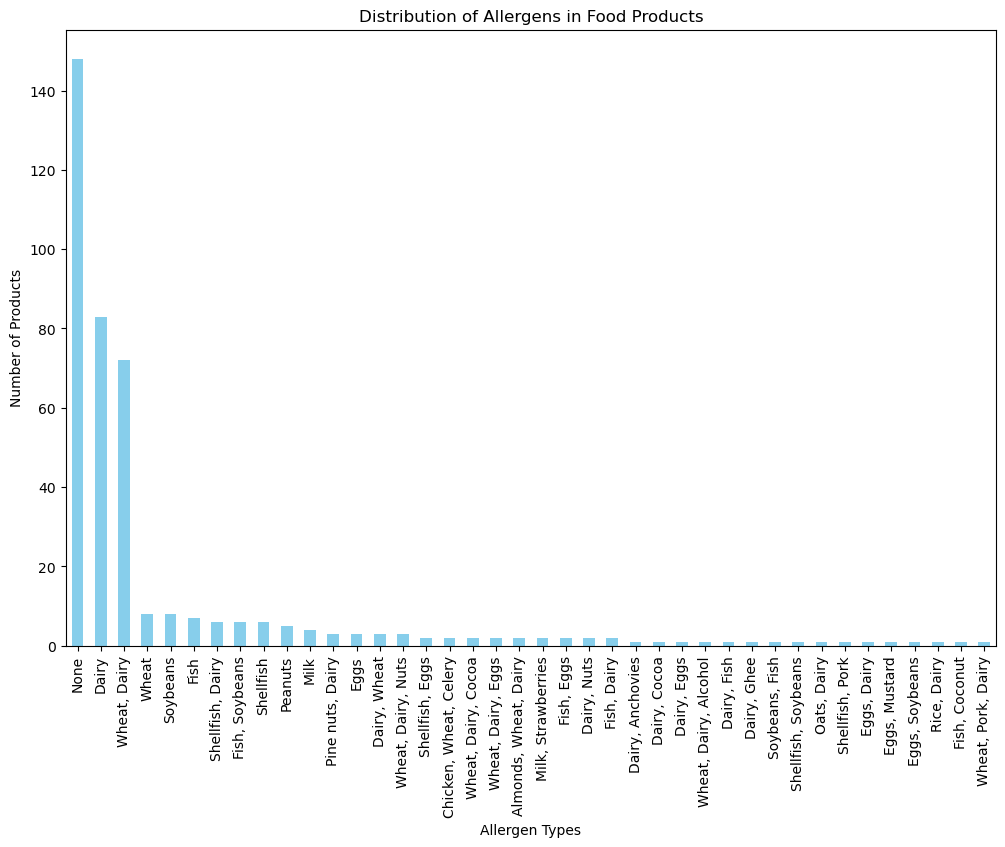

In [66]:
plt.figure(figsize=(12,8))
data['Allergens'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Allergens in Food Products')
plt.xlabel('Allergen Types')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

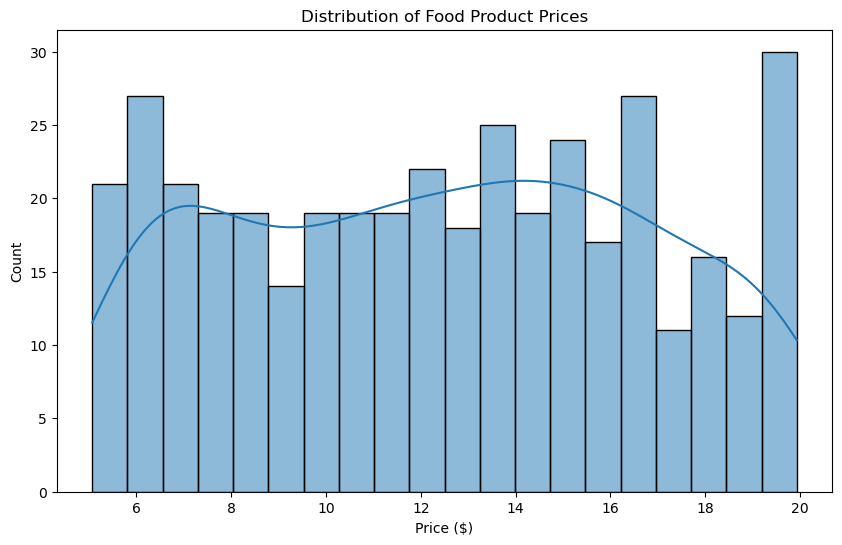

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price ($)'], bins=20, kde=True)
plt.title('Distribution of Food Product Prices')
plt.xlabel('Price ($)')
plt.show()


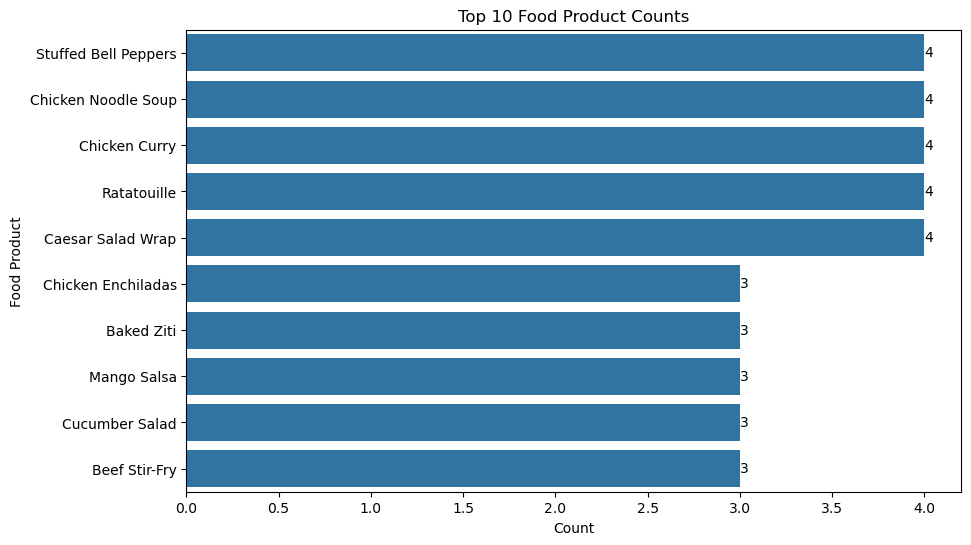

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=data['Food Product'], orient='v', order=data['Food Product'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Food Product Counts')
plt.show()


The top food products show that the top five have comparable counts, each with a maximum of four occurrences, suggesting a variety of offerings in this category but a lack of dominance by a single product.

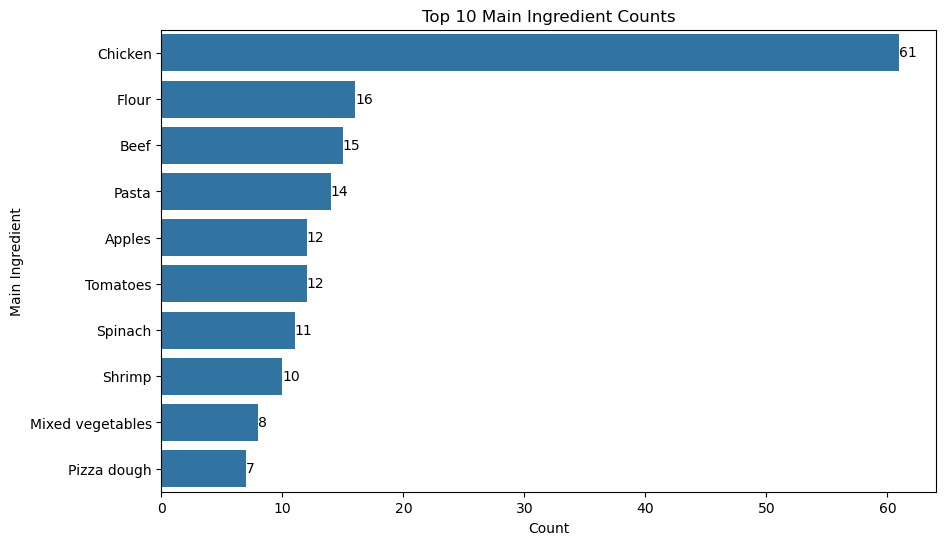

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=data['Main Ingredient'], orient='v', order=data['Main Ingredient'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Main Ingredient Counts')
plt.show()


Chicken is the most prevalent main ingredient, significantly outpacing others like flour, which has a difference of 45 counts. This indicates a strong preference for chicken-based recipes among consumers.

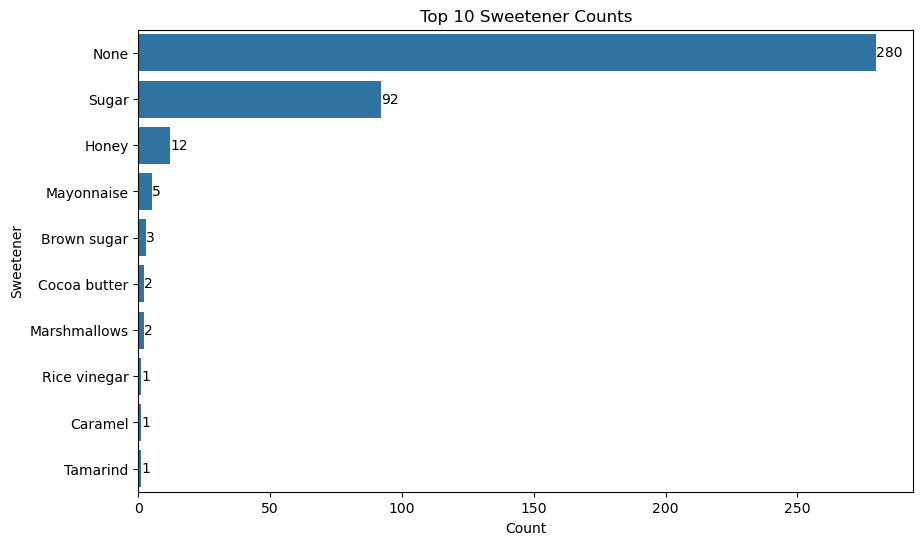

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=data['Sweetener'], orient='v', order=data['Sweetener'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Sweetener Counts')
plt.show()


Sugar leads with the highest count of 92, followed by honey. This trend highlights the common usage of sugar in food products, which may raise concerns about health implications related to sugar consumption.

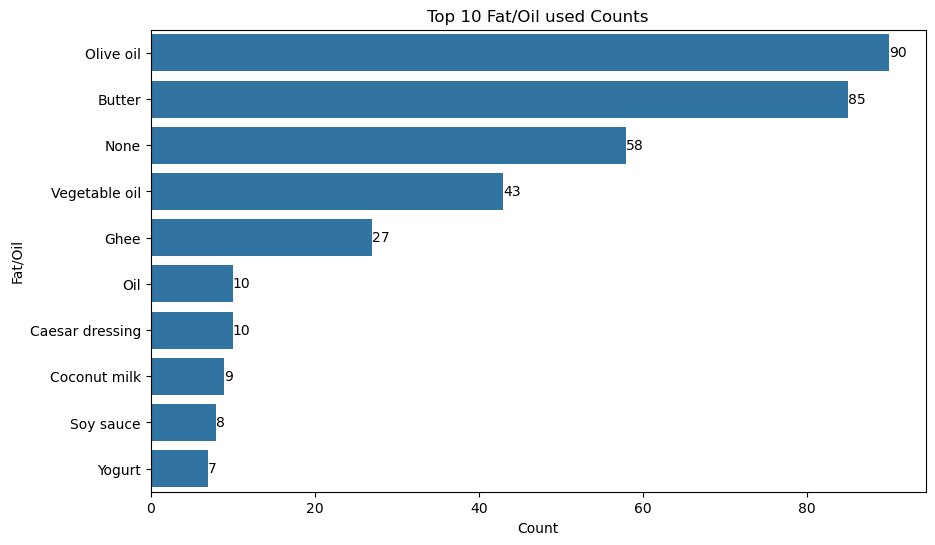

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=data['Fat/Oil'], orient='v', order=data['Fat/Oil'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Fat/Oil used Counts')
plt.show()


Olive oil is the most frequently used fat/oil type, with only a slight lead over butter, indicating a preference for healthier cooking oils in food preparation.

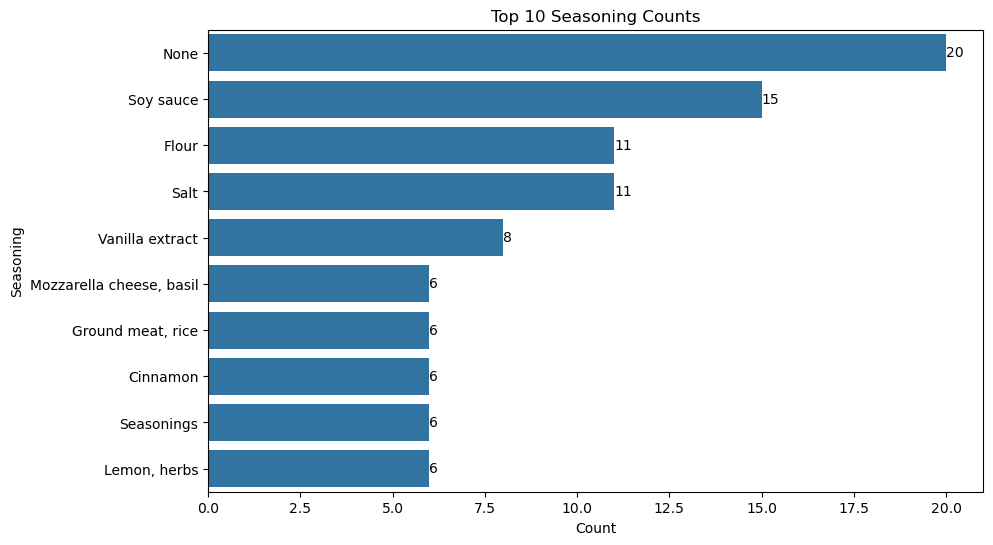

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=data['Seasoning'], orient='v', order=data['Seasoning'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Seasoning Counts')
plt.show()


Soy sauce is the most common seasoning, highlighting its significance in various recipes. The close counts among the top seasonings suggest a diversity of flavors being used.

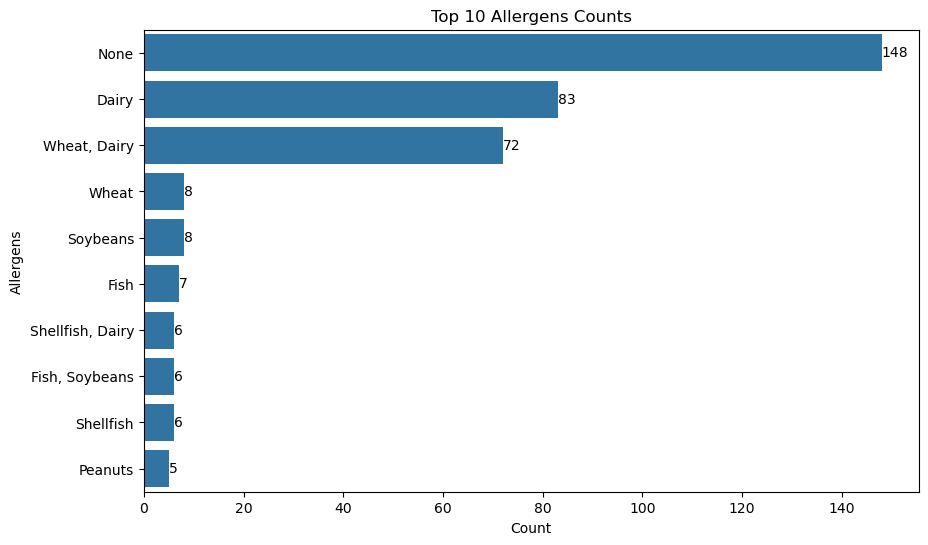

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=data['Allergens'], orient='v', order=data['Allergens'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Allergens Counts')
plt.show()


The high count of "None" suggests that a significant proportion of your food products are allergen-free. Dairy is the leading allergen with 83 occurrences, followed closely by wheat and dairy combined. This information can inform consumers about potential allergenic risks in popular food products.

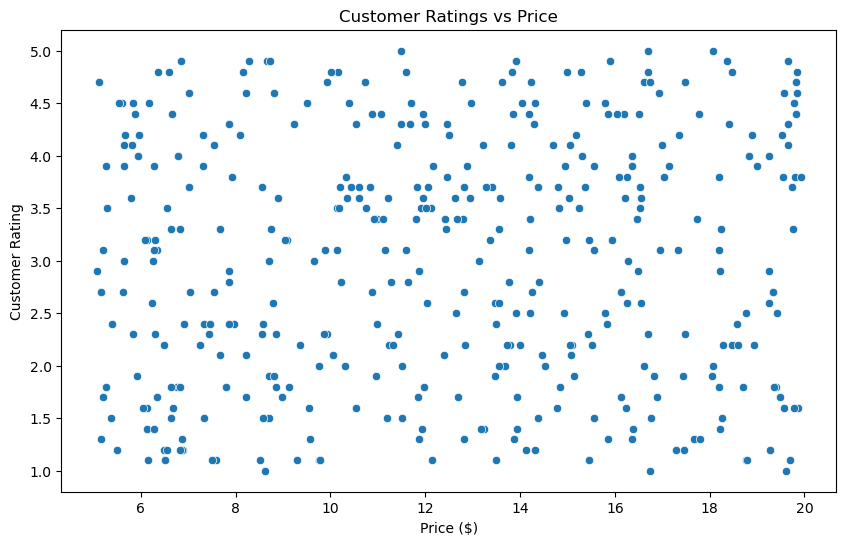

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Price ($)'], y=data['Customer rating'])
plt.title('Customer Ratings vs Price')
plt.xlabel('Price ($)')
plt.ylabel('Customer Rating')
plt.show()

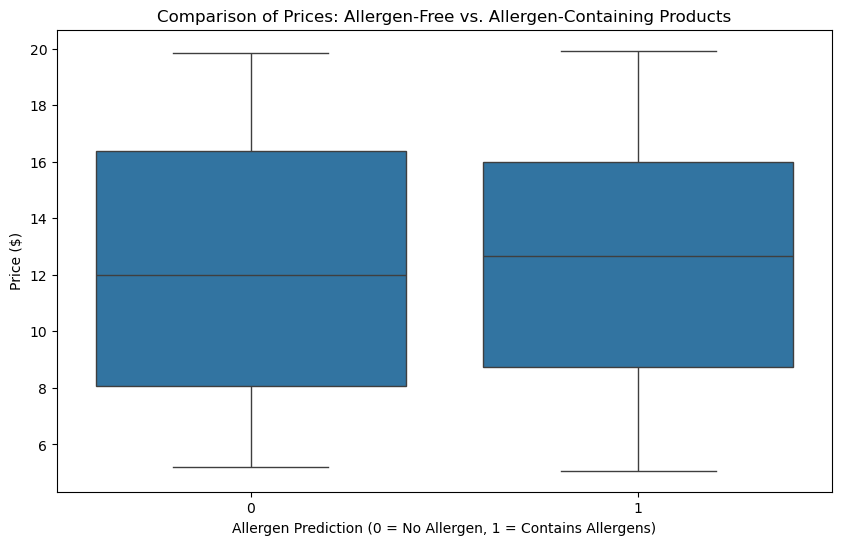

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Is_Allergen'], y=data['Price ($)'])
plt.title('Comparison of Prices: Allergen-Free vs. Allergen-Containing Products')
plt.xlabel('Allergen Prediction (0 = No Allergen, 1 = Contains Allergens)')
plt.ylabel('Price ($)')
plt.show()

In [76]:
# data['Allergen Free'] = data['Allergens'].apply(lambda x: 1 if x == 'None' else 0)

# allergen_free_count = data['Allergen Free'].value_counts()

# plt.figure(figsize=(5, 5))
# plt.pie(allergen_free_count, labels=['Contains Allergens', 'Allergen Free'], autopct='%1.1f%%', 
#         colors=['lightcoral', 'lightgreen'], startangle=90, explode=[0, 0.1])
# plt.title('Proportion of Allergen-Free vs. Allergen-Containing Products')
# plt.show()

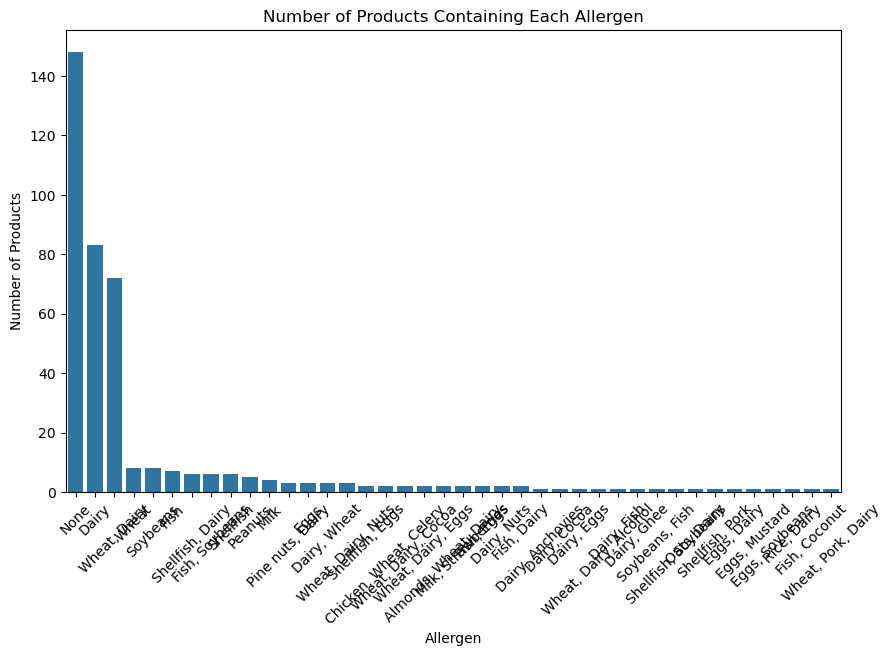

In [77]:
allergen_counts = data['Allergens'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=data['Allergens'].value_counts().index, y=allergen_counts.values)
plt.title('Number of Products Containing Each Allergen')
plt.xlabel('Allergen')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


### Visualization using Plotly

In [78]:
import plotly.express as px

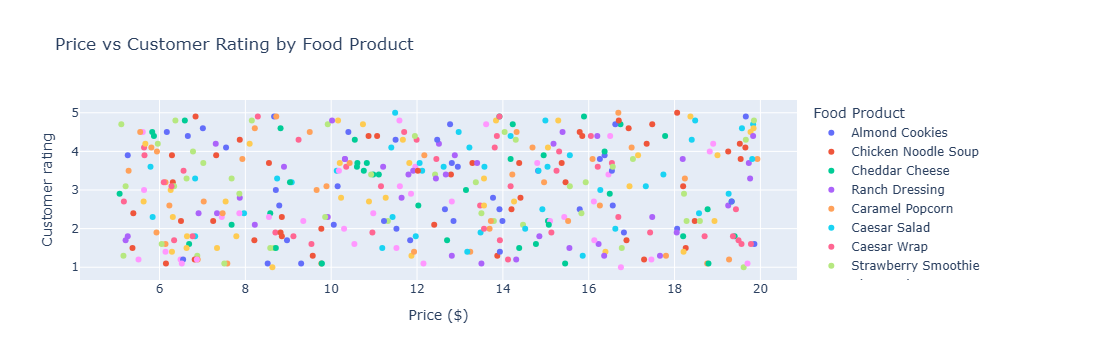

In [79]:
fig = px.scatter(data, x='Price ($)', y='Customer rating', color='Food Product', 
                 title="Price vs Customer Rating by Food Product")
fig.show()

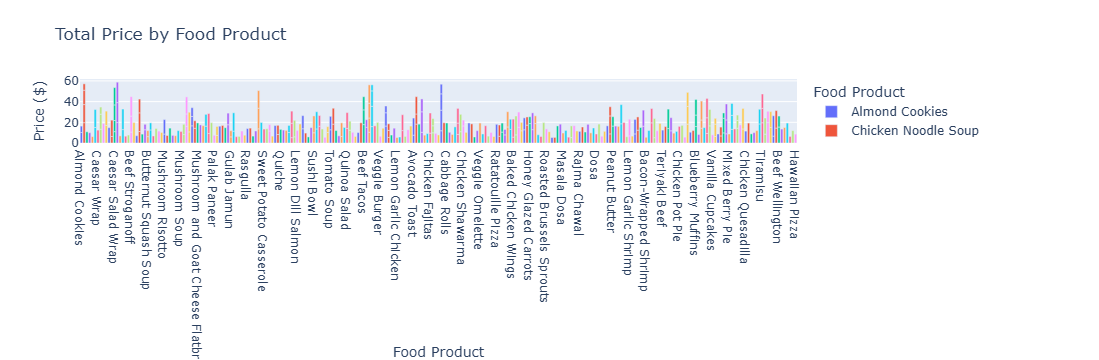

In [80]:
fig = px.bar(data, x='Food Product', y='Price ($)', color='Food Product', 
             title="Total Price by Food Product")
fig.show()

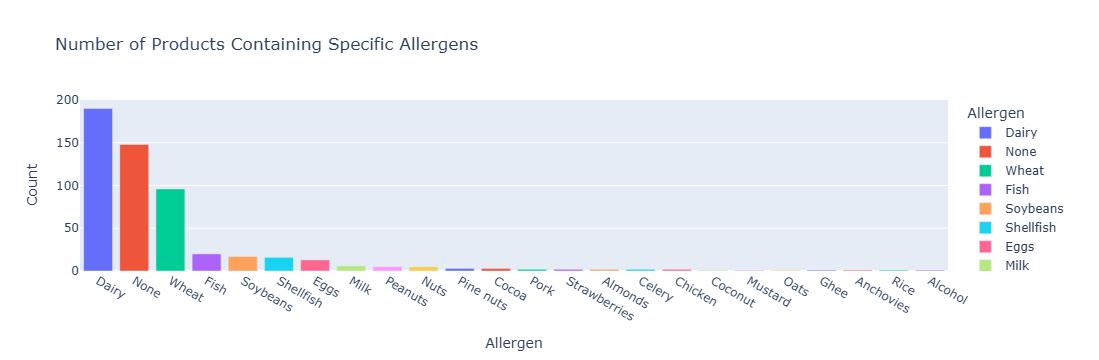

In [81]:
allergen_data = data['Allergens'].str.split(', ', expand=True).stack().value_counts().reset_index()
allergen_data.columns = ['Allergen', 'Count']
fig = px.bar(allergen_data, x='Allergen', y='Count', color='Allergen', 
             title="Number of Products Containing Specific Allergens")
fig.show()

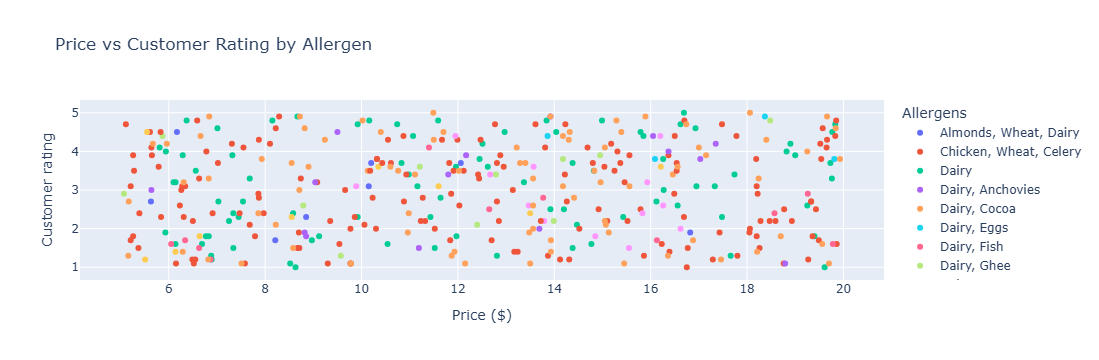

In [82]:
fig = px.scatter(data, x='Price ($)', y='Customer rating', color='Allergens', 
                 title="Price vs Customer Rating by Allergen")
fig.show()

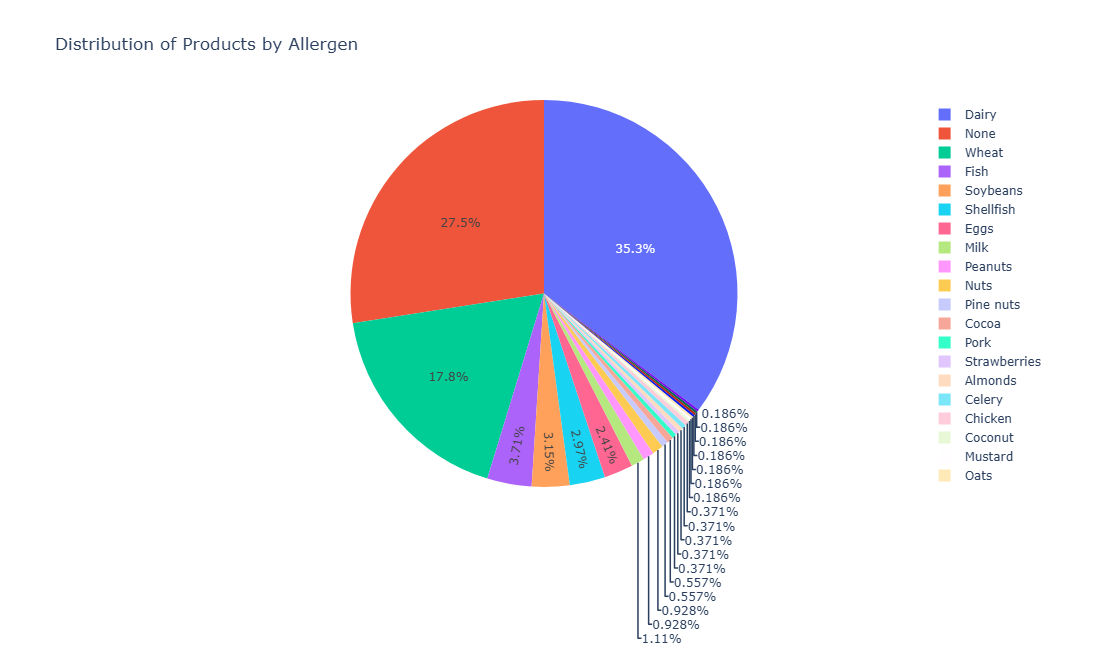

In [83]:
fig = px.pie(allergen_data, names='Allergen', values='Count', 
             title="Distribution of Products by Allergen",
              width=650, height=650)
fig.show()

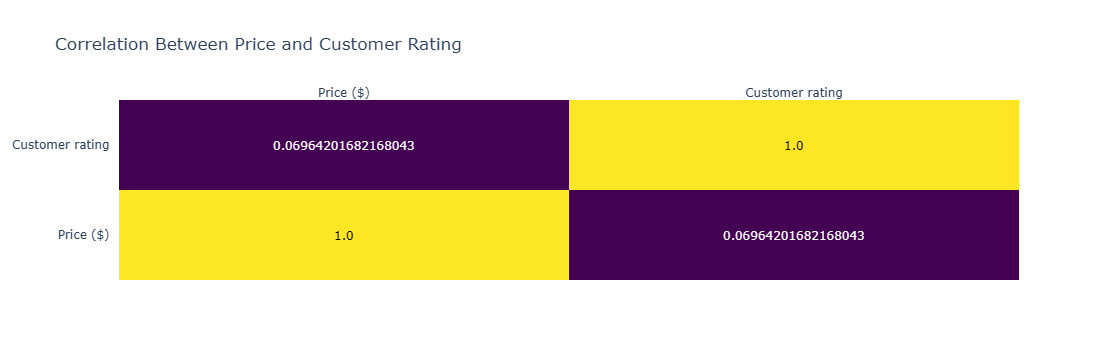

In [84]:
import plotly.figure_factory as ff
corr_matrix = data[['Price ($)', 'Customer rating']].corr()
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis')
fig.update_layout(title="Correlation Between Price and Customer Rating")
fig.show()

### Data Preprocessing

#### Handling Missing Values

In [85]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


The output shows that there are no missing values in our dataset. Each column is complete and has no NaN values. So, it saves additional preprocessing steps for handling missing data, such as filling or dropping missing values.

#### Handling Duplicate Values

In [86]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen


In [87]:
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows in the dataset: {num_duplicates}")


Number of duplicate rows in the dataset: 0


Since there are no duplicate rows in our dataset,so this step is complete and our data is already clean.

#### Outlier Detection and Handling

#### Identify outliers using the IQR method

In [88]:
Q1 = data['Price ($)'].quantile(0.25)
Q3 = data['Price ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Q1: 8.65, Q3: 16.105, IQR: 7.455
Lower Bound: -2.5325000000000006, Upper Bound: 27.2875


In [89]:
outliers = data[(data['Price ($)'] < lower_bound) | (data['Price ($)'] > upper_bound)]
outliers

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen


In [90]:
df_no_outliner = data[(data['Price ($)']>lower_bound)&(data['Price ($)']<upper_bound)]
df_no_outliner

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",5.07,2.9,1
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,1
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",12.67,3.4,1
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",15.83,2.4,1


In [91]:
print("Maximum Price:", data['Price ($)'].max())


Maximum Price: 19.93


In [92]:
df = pd.DataFrame(data)
def detect_outliers_iqr(data, column):
    if not pd.api.types.is_numeric_dtype(data[column]):
        print(f"The column '{column}' is not numeric.")
        return pd.DataFrame() 

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
for column in df.columns:
    outliers = detect_outliers_iqr(df, column)
    if not outliers.empty:
        print(f"\nOutliers in '{column}':")
        print(outliers)
    else:
        print(f"No outliers found in '{column}'.")

The column 'Food Product' is not numeric.
No outliers found in 'Food Product'.
The column 'Main Ingredient' is not numeric.
No outliers found in 'Main Ingredient'.
The column 'Sweetener' is not numeric.
No outliers found in 'Sweetener'.
The column 'Fat/Oil' is not numeric.
No outliers found in 'Fat/Oil'.
The column 'Seasoning' is not numeric.
No outliers found in 'Seasoning'.
The column 'Allergens' is not numeric.
No outliers found in 'Allergens'.
No outliers found in 'Price ($)'.
No outliers found in 'Customer rating'.
No outliers found in 'Is_Allergen'.


For the categorical columns (e.g., 'Food Product', 'Main Ingredient', etc.) the IQR method is not applicable to these columns.
For the numeric columns ('Price ($)', 'Customer rating', 'Is_Allergen', 'Allergen Free', and 'Contains Dairy'), the output indicates that no outliers were found. This means that all values in these columns fall within the calculated bounds.

In [93]:
for column in numerical:
    print(f"{column} - Max: {df[column].max()}, Min: {df[column].min()}")

Price ($) - Max: 19.93, Min: 5.07
Customer rating - Max: 5.0, Min: 1.0
Is_Allergen - Max: 1, Min: 0


In [94]:
df[numerical].describe()

,Price ($),Customer rating,Is_Allergen
count,399.000000,399.000000,399.000000
mean,12.402356,2.991228,0.639098
std,4.368315,1.171049,0.480865
min,5.070000,1.000000,0.000000
25%,8.650000,1.900000,0.000000
50%,12.470000,3.100000,1.000000
75%,16.105000,4.000000,1.000000
max,19.930000,5.000000,1.000000


In [95]:
data.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1


##### Visualize the distribution of the numeric columns using histograms


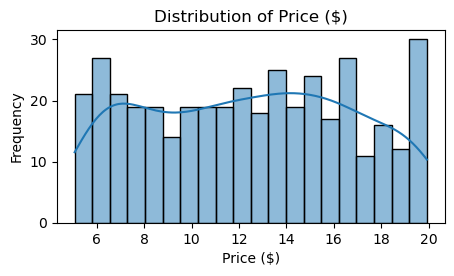

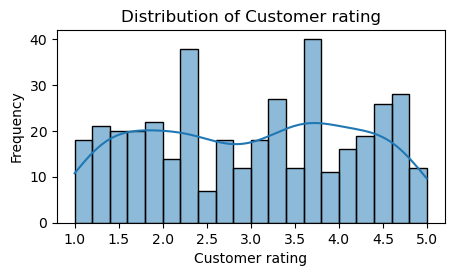

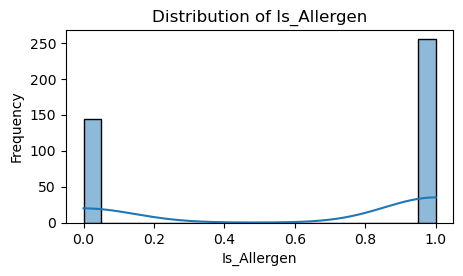

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = ['Price ($)', 'Customer rating', 'Is_Allergen']
for column in numeric_columns:
    plt.figure(figsize=(5, 2.5))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


##### Visualize the distribution of the numeric columns using Box-Plotter

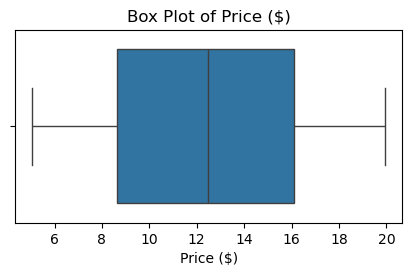

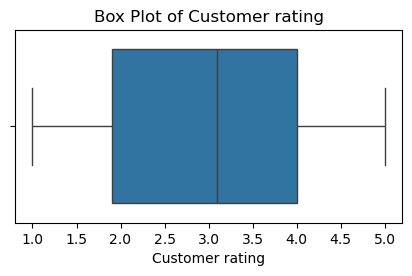

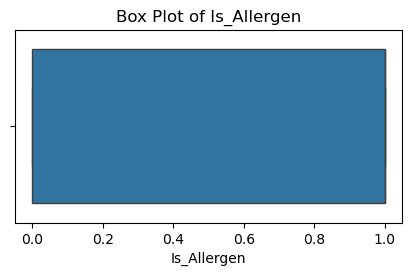

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric_columns:
    plt.figure(figsize=(5, 2.5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


In [99]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1


### Encoding Categorical Data

#### Label Encoding

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib


In [101]:
label_encoder = LabelEncoder()
data['Is_Allergen'] = label_encoder.fit_transform(data['Is_Allergen'])
data.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1


#### Leave-One-Out Encoding

In [102]:
import category_encoders as ce

categorical_cols = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']
target_col = 'Price ($)'

loo_encoder = ce.LeaveOneOutEncoder(cols = categorical_cols)

df_encoded = loo_encoder.fit_transform(df[categorical_cols], df[target_col])

df[categorical_cols] = df_encoded
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,6.170000,6.170,12.343736,12.471786,13.408,6.170000,10.15,3.1,1
1,10.150000,10.150,12.387473,12.519167,13.806,10.150000,6.17,4.5,1
2,12.500000,17.480,12.378423,12.031228,11.584,17.480000,19.65,4.1,1
3,13.223333,19.650,12.386201,12.069298,11.801,19.650000,17.48,4.7,1
4,12.402356,17.925,12.410036,12.185965,12.466,12.072073,10.83,3.7,1


In [103]:
# Saving the preprocessed DataFrame as a CSV file:

df.to_csv('SafeBite_preprocessed_data_loo_enc_price.csv', index=False)

print("DataFrame saved successfully as 'SafeBite_preprocessed_data_loo_enc_price.csv'")

DataFrame saved successfully as 'SafeBite_preprocessed_data_loo_enc_price.csv'


In [104]:
# Saving the LOO Encoder:
import joblib

joblib.dump(loo_encoder, 'loo_encoder.pkl')
print("Leave-One-Out encoder saved successfully.")

Leave-One-Out encoder saved successfully.
